### PCA 
* explore sklearn digits dataset
* PCA: components and explained variance plot
* PCA: dimension reduction


### explore sklearn digits dataset

(1797L, 64L)
(1797L, 8L, 8L)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
(1797L, 8L, 8L)


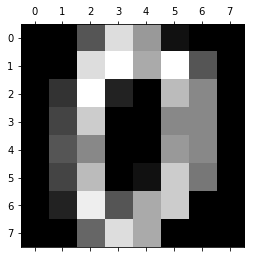

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
#print digits.keys()
#print len(digits['images']), digits['images'][0]
#print len(digits['data']), digits['data'][0]
#print digits['target_names']
#print len(digits['target']), digits['target'][:10]
#print digits['DESCR']
print digits.data.shape
print digits.images.shape
print digits.images[0]
# data is flattened array of image
print digits.data[0]

# show a image
print(digits.images.shape)
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

### PCA: component vs variance
Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Using variance, analyze the amount of information thrown away and plot the variance(cumulative) against the number of components  

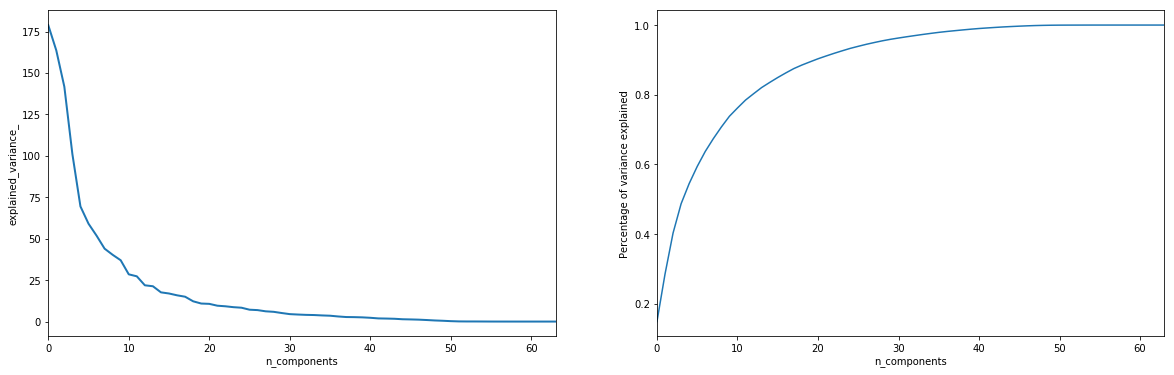

In [2]:
from sklearn import decomposition
pca = decomposition.PCA()

X_digits = digits.data
y_digits = digits.target

pca.fit(X_digits)

plt.figure(1, figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlim([0,63])
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.subplot(1,2,2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim([0,63])
plt.xlabel('n_components')
plt.ylabel('Percentage of variance explained')
plt.show()

### PCA: dimension reduction

In [3]:
# Print the shape of the matrix before and after the application of PCA on the dataset.
print "Matrix shape before application of PCA", X_digits.shape
pca = decomposition.PCA(n_components=50)
pca.fit(X_digits)
after = pca.transform(X_digits)
print "Matrix shape after application of PCA with 50 components", after.shape

Matrix shape before application of PCA (1797L, 64L)
Matrix shape after application of PCA with 50 components (1797L, 50L)


In [4]:
# PCA dimension reduction experiment with animal dataset
## dataset is from http://attributes.kyb.tuebingen.mpg.de download "base package"
# 50 animals x 85 attributes
# Do a PCA projection from R85 to R2 and visualize in 2-D graph with labeling.
animals = []
with open('../data/Animals_with_Attributes/classes.txt') as f:
    for line in f.readlines():
        s = line.strip()
        name = s[s.rindex('\t')+1:]
        animals.append(name)
data = np.loadtxt('../data/Animals_with_Attributes/predicate-matrix-continuous.txt')
print "original data shape:", data.shape

from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(data)
print "reduction to 2 key components:", reduced_data.shape

original data shape: (50L, 85L)
reduction to 2 key components: (50L, 2L)


labels for the 50 animals
[0 8 2 6 5 5 0 5 2 5 6 6 7 3 7 0 4 2 3 4 3 1 3 2 4 6 6 3 6 9 0 1 5 6 1 2 3
 0 3 0 1 3 7 6 8 5 2 6 3 2]


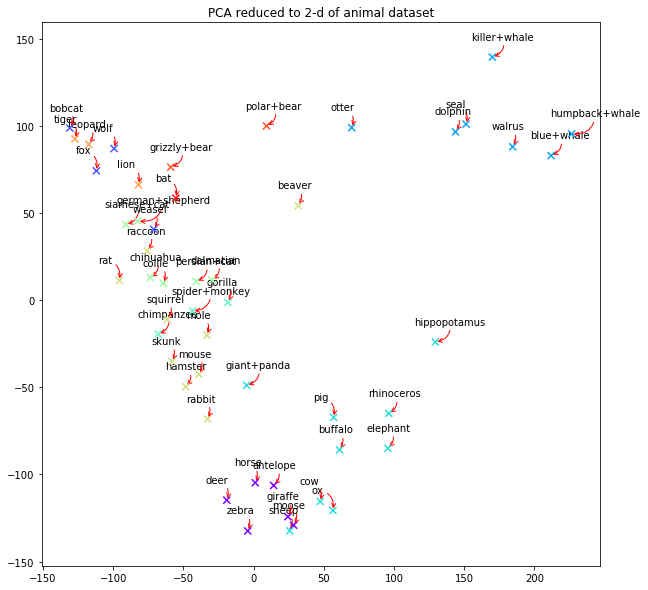

In [5]:
# with Kmeans clustering, plot the animal dataset on 2d map
import matplotlib

from sklearn.cluster import KMeans
estimator = KMeans(init='k-means++', n_clusters=10, n_init=10)
estimator.fit(data)
labels = estimator.labels_
print "labels for the 50 animals\n", labels
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
margin = 20
x_min, x_max = reduced_data[:, 0].min() - margin, reduced_data[:, 0].max() + margin
y_min, y_max = reduced_data[:, 1].min() - margin, reduced_data[:, 1].max() + margin

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()

colors = matplotlib.cm.rainbow(np.linspace(0, 1, 10))
data_colors = [colors[l] for l in labels]
# The 2-d dataset on 2d map, with color indicating its cluster
plt.title('PCA reduced to 2-d of animal dataset')
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
            marker='x', s=50, linewidths=3,
            color=data_colors, zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# annotate each data point with animal name.
ax = fig.add_subplot(111)
for i in range(reduced_data.shape[0]):
    ax.annotate(animals[i], xy=reduced_data[i], 
                xytext=(reduced_data[i][0]-15, reduced_data[i][1]+10),
                #bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', color='r'))
plt.show()

### numpy compute eigen values/vectors

In [6]:
# load MNIST dataset
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [7]:
print "MNIST data shape:", mnist.data.shape
cov_mat = np.cov(mnist.data.T)
print "shape of covariance matrix:", cov_mat.shape
eigenvalues = np.linalg.eigvals(cov_mat)
print "number of eigenvalues:", eigenvalues.shape

whole_sum = sum(eigenvalues)
for k in [200, 150, 100, 50, 25]:
    print "lost fraction for k=%d is: %.4f" % (k, sum(eigenvalues[k:])/whole_sum)

MNIST data shape: (70000L, 784L)
shape of covariance matrix: (784L, 784L)
number of eigenvalues: (784L,)
lost fraction for k=200 is: 0.0335
lost fraction for k=150 is: 0.0515
lost fraction for k=100 is: 0.0850
lost fraction for k=50 is: 0.1746
lost fraction for k=25 is: 0.3070


c:\Users\wenyan\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


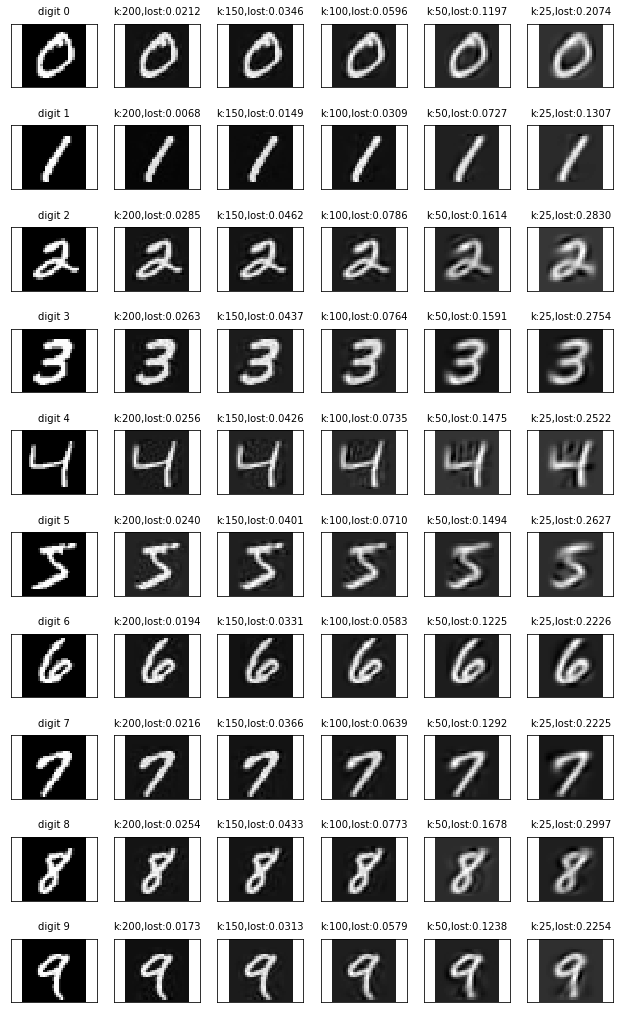

In [8]:
# show 10 digits with component reduction of different count
row,col = 10, 6
fig, ax = plt.subplots(row, col, figsize=(col*1.8, row*1.8), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.6)    

def show_digit(ax, data, title):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    ax.matshow(np.reshape(data,(28,28)))
    ax.set_title(title, size=10)

for j in xrange(10):
    index_j = [i for i in range(len(mnist.target)) if mnist.target[i] == j]
    data_j = mnist.data[index_j]
    cov_mat = np.cov(data_j.T)
    eigenvalues = np.linalg.eigvals(cov_mat)

    whole_sum = sum(eigenvalues)
    
    img_original = data_j[0]  # simply pick 1st image for each digit category
    show_digit(ax[j,0], img_original, "digit %d" %(j))
    for i,k in enumerate([200, 150, 100, 50, 25]):
        lost_fraction = sum(eigenvalues[k:])/whole_sum
        pca = decomposition.PCA(n_components=k)
        pca.fit(data_j)
        mu = np.mean(data_j, axis=0)
        img_after = np.dot(pca.transform(data_j[0].reshape(1,-1)), pca.components_) + mu
        show_digit(ax[j,i+1], img_after, "k:%d,lost:%.4f" %(k,lost_fraction))

plt.show()

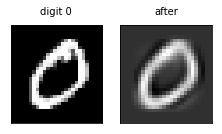

In [11]:
data_j = mnist.data[mnist.target == 0]
cov_mat = np.cov(data_j.T)
eigenvalues = np.linalg.eigvals(cov_mat)

whole_sum = sum(eigenvalues)

row,col = 1, 2
fig, ax = plt.subplots(row, col, figsize=(col*1.8, row*1.8), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.6)    

img_original = data_j[0]  # simply pick 1st image for each digit category
show_digit(ax[0], img_original, "digit %d" %(0))
pca = decomposition.PCA(n_components=25)
pca.fit(data_j)
mu = np.mean(data_j, axis=0)
img_after = np.dot(pca.transform(data_j[0].reshape(1,-1)), pca.components_) + mu
show_digit(ax[1], img_after, "after")

plt.show()

In [13]:
pca.components_.shape

(25L, 784L)

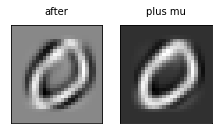

In [28]:
fig, ax = plt.subplots(row, col, figsize=(col*1.8, row*1.8), sharex='col', sharey='row')
img_after = np.dot(pca.transform(data_j[0].reshape(1,-1)), pca.components_) 
show_digit(ax[0], img_after, "after")
show_digit(ax[1], img_after+mu, "plus mu")
plt.show()

In [23]:
img_after.shape

(1L, 784L)

In [26]:
img_after

array([[  5.30743535e-14,  -6.51809174e-14,   3.03900634e-14,
         -4.84727638e-15,  -1.02785227e-13,  -3.26838173e-15,
          1.50176133e-13,  -4.17059731e-14,   7.53031403e-15,
         -3.41616441e-15,   8.23888228e-14,  -7.74642597e-15,
         -7.31909478e-15,  -4.14171917e-14,  -1.44358733e-14,
          1.48557322e-14,  -2.24324513e-14,   3.64983013e-15,
         -1.58021046e-14,  -1.46471912e-15,   3.25898285e-15,
         -4.07254723e-15,   1.66422372e-15,   1.28416987e-15,
          1.61519460e-15,  -6.39656981e-15,  -2.90558072e-15,
         -1.84621487e-15,   1.68281175e-17,  -2.61019941e-16,
          2.34956811e-16,   2.35810397e-16,  -1.34119507e-16,
          2.71373521e-16,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -1.72517872e-02,  -3.40992356e-02,  -1.40170771e-02,
          0.00000000e+00,  -4.36627310e-02,  -1.19344798e-01,
         -5.67615503e-02,   0.00000000e+00,   0.00000000e+00,
        

In [27]:
img_after + mu

array([[  5.30743535e-14,  -6.51809174e-14,   3.03900634e-14,
         -4.84727638e-15,  -1.02785227e-13,  -3.26838173e-15,
          1.50176133e-13,  -4.17059731e-14,   7.53031403e-15,
         -3.41616441e-15,   8.23888228e-14,  -7.74642597e-15,
         -7.31909478e-15,  -4.14171917e-14,  -1.44358733e-14,
          1.48557322e-14,  -2.24324513e-14,   3.64983013e-15,
         -1.58021046e-14,  -1.46471912e-15,   3.25898285e-15,
         -4.07254723e-15,   1.66422372e-15,   1.28416987e-15,
          1.61519460e-15,  -6.39656981e-15,  -2.90558072e-15,
         -1.84621487e-15,   1.68281175e-17,  -2.61019941e-16,
          2.34956811e-16,   2.35810397e-16,  -1.34119507e-16,
          2.71373521e-16,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.29087543e-03,   2.55149596e-03,   1.04883628e-03,
          0.00000000e+00,  -3.06249213e-02,  -8.37081183e-02,
         -3.98123977e-02,   0.00000000e+00,   0.00000000e+00,
        